# 1.Import required python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 2.Import data from the data source.

In [2]:
income_df=pd.read_csv('DS2_C5_S3_Income_Data_Challenge.csv.crdownload')
income_df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,44,Private,266135,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
5221,18,Private,300379,12th,8,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,12.0,United-States,<=50K
5222,54,Federal-gov,392502,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
5223,61,Private,73809,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K


In [3]:
income_df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [4]:
income_df.shape

(5225, 15)

# 3.Check the structure of data.

In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5225 non-null   int64  
 1   WorkClass       5225 non-null   object 
 2   Fnlwgt          5225 non-null   int64  
 3   Education       5225 non-null   object 
 4   Education_Num   5225 non-null   int64  
 5   Marital_Status  5225 non-null   object 
 6   Occupation      5224 non-null   object 
 7   Relationship    5224 non-null   object 
 8   Race            5224 non-null   object 
 9   Gender          5224 non-null   object 
 10  Capital_Gain    5224 non-null   float64
 11  Capital_Loss    5224 non-null   float64
 12  Hours_Per_Week  5224 non-null   float64
 13  Native_Country  5224 non-null   object 
 14  Income_Bracket  5224 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 612.4+ KB


# 4.Summarise the data.

In [6]:
income_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,5225.000000,5.225000e+03,5225.000000,5224.000000,5224.000000,5224.000000
mean,38.631196,1.903736e+05,10.077703,1052.987940,94.003828,40.487749
std,13.617732,1.058690e+05,2.541932,7186.668709,411.567419,12.094491
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.791860e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.412590e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000


In [7]:
cat=[]
num=[]
for i in income_df.columns:
    if income_df[i].nunique()<10:
        cat.append(i)
    else:
        num.append(i)

In [8]:
cat

['WorkClass',
 'Marital_Status',
 'Relationship',
 'Race',
 'Gender',
 'Income_Bracket']

In [9]:
num

['Age',
 'Fnlwgt',
 'Education',
 'Education_Num',
 'Occupation',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week',
 'Native_Country']

# Task 2

# 1.Check if there is any missing value exists in any feature.identity those features.

In [10]:
income_df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        1
Relationship      1
Race              1
Gender            1
Capital_Gain      1
Capital_Loss      1
Hours_Per_Week    1
Native_Country    1
Income_Bracket    1
dtype: int64

# 2.Perform missing value treatment for catgorical and numerical features if any require.

In [11]:
income_df[income_df['Occupation'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
income_df['Occupation'].value_counts()

 Prof-specialty       655
 Craft-repair         650
 Exec-managerial      644
 Sales                622
 Adm-clerical         598
 Other-service        516
 ?                    341
 Machine-op-inspct    326
 Transport-moving     259
 Handlers-cleaners    202
 Farming-fishing      153
 Tech-support         142
 Protective-serv       95
 Priv-house-serv       19
 Armed-Forces           2
Name: Occupation, dtype: int64

In [13]:
income_df['Occupation']=income_df['Occupation'].fillna('Prof-specialty')

In [14]:
income_df[income_df['Relationship'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
income_df['Relationship'].value_counts()

 Husband           2094
 Not-in-family     1349
 Own-child          802
 Unmarried          561
 Wife               262
 Other-relative     156
Name: Relationship, dtype: int64

In [16]:
income_df['Relationship']=income_df['Relationship'].fillna('Husband')

In [17]:
income_df[income_df['Race'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
income_df['Race'].value_counts()

 White                 4440
 Black                  539
 Asian-Pac-Islander     160
 Amer-Indian-Eskimo      52
 Other                   33
Name: Race, dtype: int64

In [19]:
income_df['Race']=income_df['Race'].fillna('White')

In [20]:
income_df[income_df['Gender'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,White,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
income_df['Gender'].value_counts()

 Male      3523
 Female    1701
Name: Gender, dtype: int64

In [22]:
income_df['Gender']=income_df['Gender'].fillna('Male')

In [23]:
income_df[income_df['Native_Country'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,NaN,NaN


In [24]:
income_df['Native_Country'].value_counts()

 United-States                 4667
 Mexico                         108
 ?                              101
 Canada                          31
 Germany                         23
 Philippines                     22
 Puerto-Rico                     17
 Jamaica                         16
 El-Salvador                     16
 England                         16
 Cuba                            16
 China                           15
 Dominican-Republic              13
 Taiwan                          12
 Italy                           12
 Iran                            12
 India                           12
 Poland                          11
 Vietnam                         10
 Japan                           10
 Guatemala                       10
 South                            9
 Portugal                         7
 Greece                           6
 Haiti                            6
 Columbia                         5
 Nicaragua                        5
 Trinadad&Tobago            

In [25]:
income_df['Native_Country']=income_df['Native_Country'].fillna('United-States')

In [26]:
income_df[income_df['Income_Bracket'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN


In [27]:
income_df['Income_Bracket'].value_counts()

 <=50K    3951
 >50K     1273
Name: Income_Bracket, dtype: int64

In [28]:
income_df['Income_Bracket']=income_df['Income_Bracket'].fillna('<=50K')


In [29]:
income_df[income_df['Capital_Loss'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K


In [30]:
income_df['Capital_Loss'].value_counts()

0.0       4957
1902.0      42
1977.0      32
1887.0      24
2415.0      11
1848.0       9
1485.0       9
1672.0       8
1590.0       8
1741.0       7
1740.0       7
1719.0       6
1564.0       6
1876.0       6
1628.0       6
1762.0       6
1980.0       5
1669.0       5
2392.0       4
2339.0       4
1408.0       4
2002.0       4
2377.0       3
2179.0       3
1579.0       3
2001.0       3
1340.0       3
2258.0       3
625.0        2
1602.0       2
2051.0       2
1504.0       2
2352.0       2
1721.0       2
1380.0       2
2206.0       2
1816.0       2
880.0        1
1668.0       1
2444.0       1
1539.0       1
213.0        1
1092.0       1
2238.0       1
1138.0       1
653.0        1
1726.0       1
2205.0       1
2174.0       1
2547.0       1
419.0        1
1651.0       1
2042.0       1
1573.0       1
1594.0       1
Name: Capital_Loss, dtype: int64

In [31]:
income_df['Capital_Loss']=income_df['Capital_Loss'].fillna(0.0)

In [32]:
income_df[income_df['Capital_Gain'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,White,Male,NaN,0.0,NaN,United-States,<=50K


In [33]:
income_df['Capital_Gain'].value_counts()

0.0        4782
15024.0      66
7688.0       50
7298.0       39
99999.0      24
           ... 
1111.0        1
401.0         1
1471.0        1
2977.0        1
3418.0        1
Name: Capital_Gain, Length: 84, dtype: int64

In [34]:
income_df['Capital_Gain']=income_df['Capital_Gain'].fillna(0.0)

In [35]:
income_df[income_df['Hours_Per_Week'].isnull()]

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
5224,51,Private,193720,Bachelors,13,Marri,Prof-specialty,Husband,White,Male,0.0,0.0,NaN,United-States,<=50K


In [36]:
income_df['Hours_Per_Week'].value_counts()

40.0    2449
50.0     474
45.0     288
60.0     255
35.0     212
        ... 
19.0       1
68.0       1
31.0       1
51.0       1
77.0       1
Name: Hours_Per_Week, Length: 74, dtype: int64

In [37]:
income_df['Hours_Per_Week']=income_df['Hours_Per_Week'].fillna(40.0)

In [38]:
income_df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [39]:
income_df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,44,Private,266135,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
5221,18,Private,300379,12th,8,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,12.0,United-States,<=50K
5222,54,Federal-gov,392502,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
5223,61,Private,73809,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K


# 3.Convert non-numeric labeled columns into categorical types.

In [40]:
income_df['WorkClass']=income_df['WorkClass'].astype('category')
income_df['Marital_Status']=income_df['Marital_Status'].astype('category')
income_df['Relationship']=income_df['Relationship'].astype('category')
income_df['Race']=income_df['Race'].astype('category')
income_df['Gender']=income_df['Gender'].astype('category')
income_df['Income_Bracket']=income_df['Income_Bracket'].astype('category')

# 4. Use Label Encoder techinnque to convert categorical columns into numerical types.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
x=LabelEncoder()

In [43]:
income_df['WorkClass']=x.fit_transform(income_df['WorkClass'])
income_df['Marital_Status']=x.fit_transform(income_df['Marital_Status'])
income_df['Relationship']=x.fit_transform(income_df['Relationship'])
income_df['Race']=x.fit_transform(income_df['Race'])
income_df['Gender']=x.fit_transform(income_df['Gender'])
income_df['Income_Bracket']=x.fit_transform(income_df['Income_Bracket'])
income_df['Education']=x.fit_transform(income_df['Education'])
income_df['Occupation']=x.fit_transform(income_df['Occupation'])
income_df['Native_Country']=x.fit_transform(income_df['Native_Country'])


# 5.Perform the data scaling.

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
def feature_scaling(scale):
    new_df=income_df.select_dtypes(exclude=['object','category'])
    if scale=='minmax':
        scaler=preprocessing.MinMaxScaler()
    else:
        scaler=preprocessing.standardscaler()
    scale_df=pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)
    return scale_df
final_df=feature_scaling('minmax')
final_df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.857143,0.057415,0.600000,0.800000,0.714286,0.066667,0.166667,0.8,0.5,0.02174,0.0,0.397959,0.925,0.0
1,0.452055,0.714286,0.063130,0.600000,0.800000,0.428571,0.266667,0.000000,0.8,0.5,0.00000,0.0,0.122449,0.925,0.0
2,0.287671,0.428571,0.193648,0.733333,0.533333,0.000000,0.400000,0.166667,0.8,0.5,0.00000,0.0,0.397959,0.925,0.0
3,0.493151,0.428571,0.212462,0.066667,0.400000,0.428571,0.400000,0.000000,0.4,0.5,0.00000,0.0,0.397959,0.925,0.0
4,0.150685,0.428571,0.314726,0.600000,0.800000,0.428571,0.666667,0.833333,0.4,0.0,0.00000,0.0,0.397959,0.125,0.0


# Task 2:Data preparation and visualization(contd).

# 6.Select the test features based on their correlation value.

In [46]:
income_df.corr().T

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.049555,-0.076777,-0.026686,0.022439,-0.231200,-0.010577,-0.254472,0.026368,0.070172,0.060564,0.058641,0.040938,0.007614,0.230580
WorkClass,0.049555,1.000000,-0.021095,0.032040,0.100790,-0.075968,0.272373,-0.116913,0.060315,0.108301,0.047915,0.009946,0.147920,-0.012535,0.087075
Fnlwgt,-0.076777,-0.021095,1.000000,-0.052971,-0.058953,0.042202,0.012624,0.013068,-0.018114,0.035331,-0.004440,-0.002639,-0.006194,-0.057819,-0.023314
Education,-0.026686,0.032040,-0.052971,1.000000,0.357898,-0.023691,-0.010690,-0.001576,0.022980,-0.035012,0.036098,0.026254,0.043782,0.063704,0.058625
Education_Num,0.022439,0.100790,-0.058953,0.357898,1.000000,-0.047258,0.123446,-0.093122,0.038518,0.017840,0.118657,0.099712,0.161949,0.025849,0.317333
Marital_Status,-0.231200,-0.075968,0.042202,-0.023691,-0.047258,1.000000,-0.002758,0.106664,-0.073142,-0.037554,-0.039038,-0.025418,-0.182464,-0.020939,-0.150257
Occupation,-0.010577,0.272373,0.012624,-0.010690,0.123446,-0.002758,1.000000,-0.092054,0.010990,0.093350,0.035920,0.017298,0.096956,-0.022169,0.081739
Relationship,-0.254472,-0.116913,0.013068,-0.001576,-0.093122,0.106664,-0.092054,1.000000,-0.116854,-0.565888,-0.051803,-0.057357,-0.258661,0.007618,-0.236597
Race,0.026368,0.060315,-0.018114,0.022980,0.038518,-0.073142,0.010990,-0.116854,1.000000,0.089470,0.017462,0.027262,0.045062,0.125436,0.077722
Gender,0.070172,0.108301,0.035331,-0.035012,0.017840,-0.037554,0.093350,-0.565888,0.089470,1.000000,0.039618,0.061148,0.227462,-0.020855,0.201091


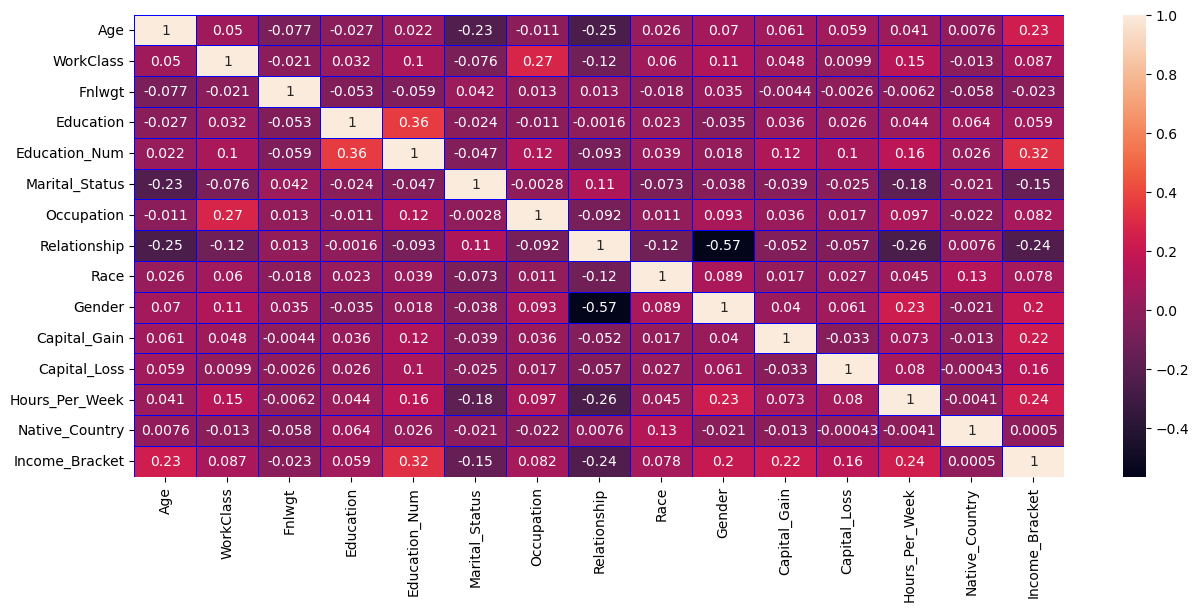

In [47]:
plt.figure(figsize=(15,6))
sb.heatmap(income_df.corr(),annot=True,linecolor='b',linewidth=.5);

# 7.Split the data into train set and test est in 80:20 ratio by row index.

In [48]:
X=income_df.drop(columns='Income_Bracket',axis=1)
Y=income_df['Income_Bracket']

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=100)

In [50]:
X_train.shape

(4180, 14)

In [51]:
Y_train.shape

(4180,)

# 8.Perform all features data visualization to present the data.

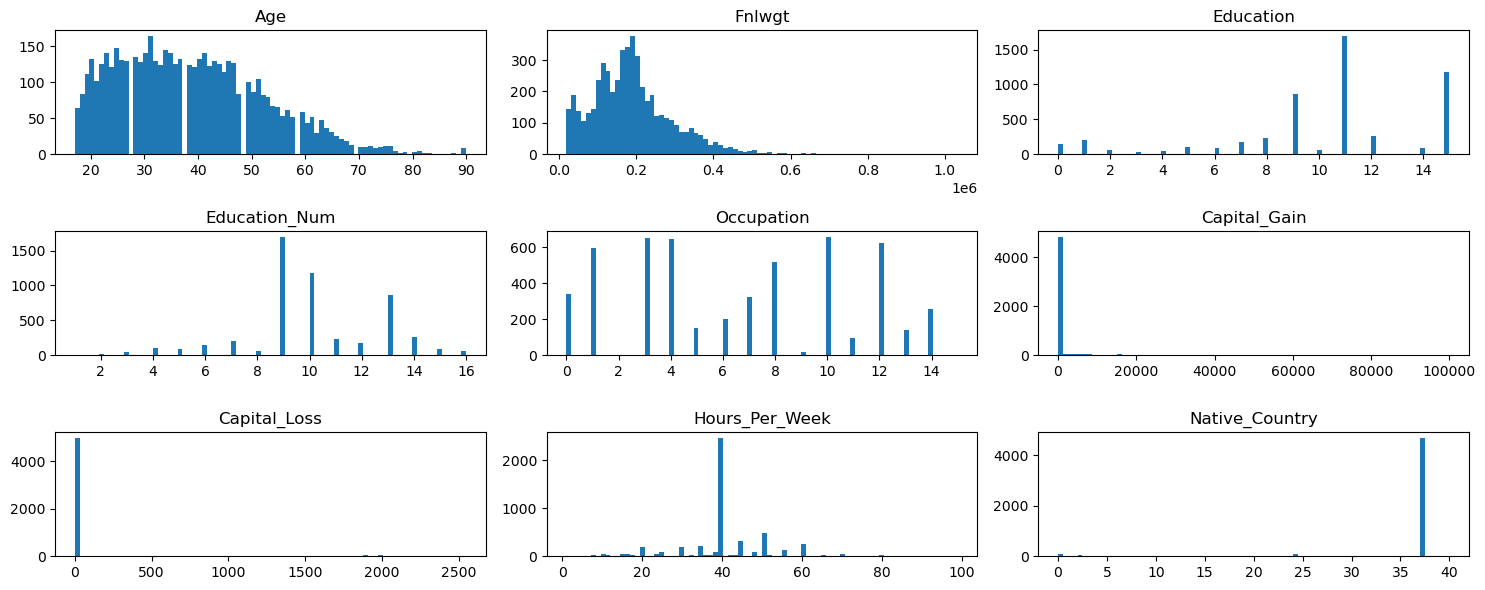

In [57]:
numeric=num
num_cols=3
bins=80
num_rows=int(len(numeric)/num_cols)
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(15,6))
for col, ax in zip(numeric,axs.flatten()[:len(numeric)]):
    ax.hist(income_df[col],bins=bins)
    ax.set_title(col)

# Visualization for categorical data.

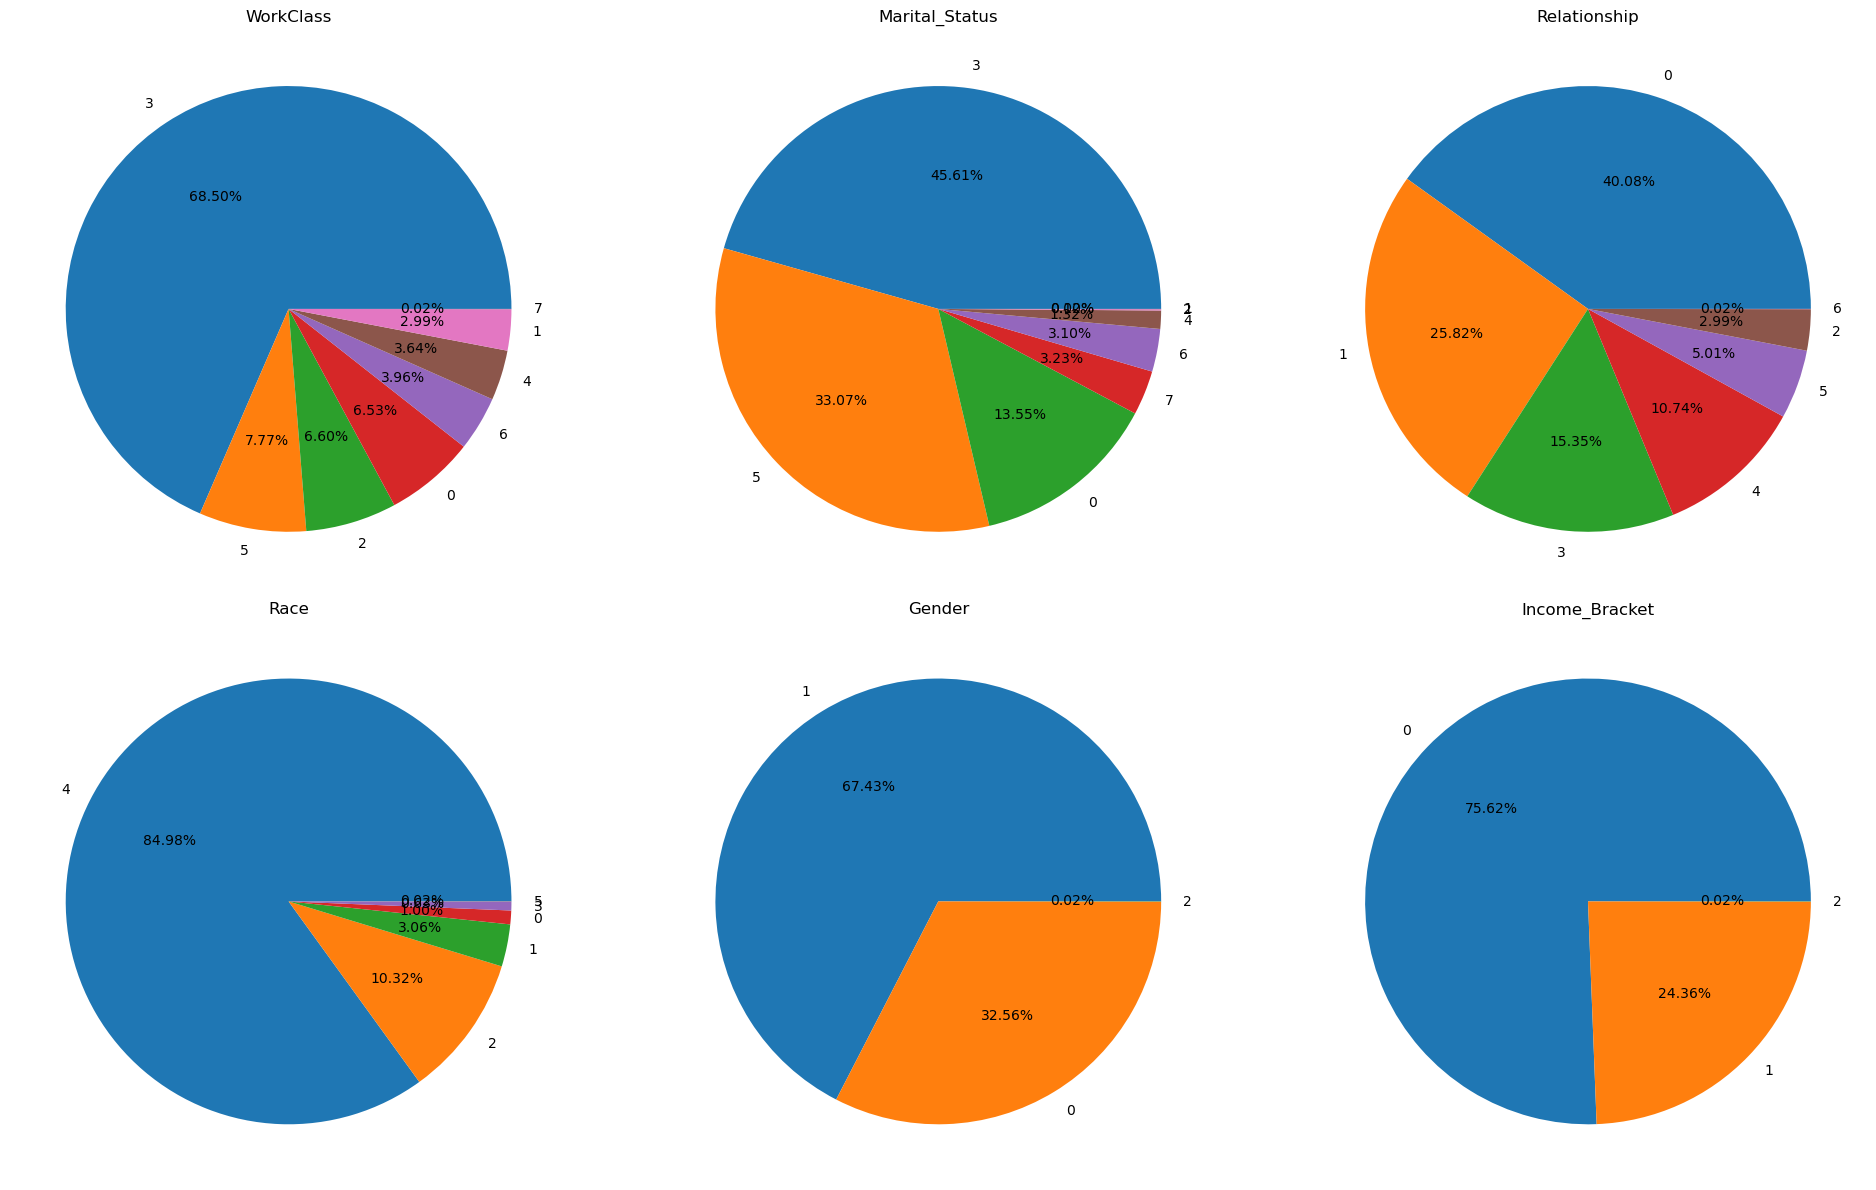

In [58]:
cat_col=cat
num_cols=3
num_row=int(len(cat_col)/num_cols)
fig,axs=plt.subplots(num_row,num_cols,tight_layout=True,figsize=(20,12))
for col,ax in zip(cat_col,axs.flatten()[:len(cat_col)]):
    ax.pie(labels=income_df[col].value_counts().index,x=income_df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

In [53]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5225 non-null   int64  
 1   WorkClass       5225 non-null   int32  
 2   Fnlwgt          5225 non-null   int64  
 3   Education       5225 non-null   int32  
 4   Education_Num   5225 non-null   int64  
 5   Marital_Status  5225 non-null   int32  
 6   Occupation      5225 non-null   int32  
 7   Relationship    5225 non-null   int32  
 8   Race            5225 non-null   int32  
 9   Gender          5225 non-null   int32  
 10  Capital_Gain    5225 non-null   float64
 11  Capital_Loss    5225 non-null   float64
 12  Hours_Per_Week  5225 non-null   float64
 13  Native_Country  5225 non-null   int32  
 14  Income_Bracket  5225 non-null   int32  
dtypes: float64(3), int32(9), int64(3)
memory usage: 428.7 KB


# Task 3:Train the Model.

# 1. Bulid a Logistic regression model by fitting the training dataset.

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.7880382775119618

In [60]:
# predict_y
pred_y=model.predict(X_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

# a Logistic regression model by fitting the testing dataset.

In [64]:
model.fit(X_test,Y_test)
model.score(X_train,Y_train)

0.7854066985645933

# 2.Predict the income of the test dataset using your model.

# Task 4: Model Evaluation.

# 1.Bulid  a confusion matrix.

In [322]:
df=pd.DataFrame(X_train.columns)
df.columns=['Features']
df['coef']=model.coef_[0]
df.sort_index(ascending=True)

,Features,coef
0,Age,-0.008764
1,WorkClass,0.001224
2,Fnlwgt,0.000030
3,Education,0.006231
4,Education_Num,-0.001213
5,Marital_Status,0.006359
6,Occupation,0.001221
7,Relationship,0.006293
8,Race,0.002356
9,Gender,-0.000696


# 2.Evalute different evaluation metrics values and interpet the model evaluation.

In [325]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report,accuracy_score

In [327]:
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       794
           1       0.62      0.26      0.37       251

    accuracy                           0.78      1045
   macro avg       0.71      0.60      0.62      1045
weighted avg       0.76      0.78      0.75      1045



# 3.Evalute ROC and AUC score.

In [340]:
from sklearn.metrics import roc_auc_score

In [341]:
roc=roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
roc

0.7098909149297019

# 4.Draw the ROC and AUC curve and interpet model's performance from the curves.

In [343]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'tpr')

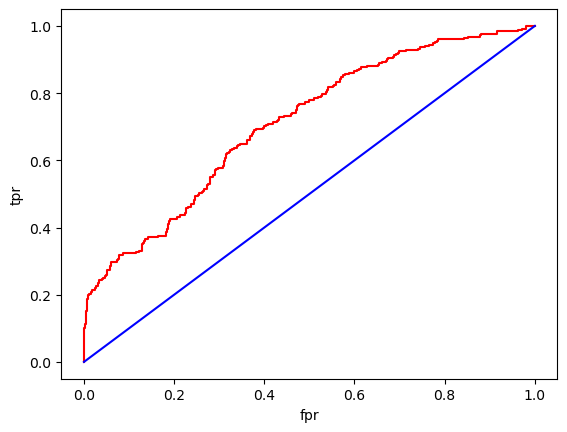

In [344]:
probability_value=model.predict_proba(X_test)[:,1]
fpr,tpr,threshode=roc_curve(Y_test,probability_value)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('fpr')
plt.ylabel('tpr')